# Assignment №1

## Exercise №1

### 1. Loading and preprocessing data

In [428]:
import numpy as np
import re
import pandas as pd
import scipy as sc
import matplotlib.pylab as plt

In [160]:
file_obj = open("sentences.txt", 'r')
data_list = file_obj.readlines()
# for each string in data_list apply lower() function
def toLowerCase(d_list):
    stripped_and_lowercased = [re.sub("[.,?!]", "", line.lower()) for line in d_list if line != ""]
    return stripped_and_lowercased

In [161]:
# applying preprocessing to all lines in text
low_data_list = toLowerCase(data_list)

### 2. Splitting and tokenizing

In [162]:
list_of_tokens = [re.split("[^a-z]", line) for line in low_data_list]
list_of_tokens_no_blank = [[l for l in lst if l != ''] for lst in list_of_tokens]

### 3. Creating dictionary {'word': order_in_list}

In [169]:
# list of all distinct words in sentences sorted by alphabet order
flatten_list_of_words = [word for sentence in list_of_tokens_no_blank
                            for word in sentence]
distinct_words = sorted(list(set(flatten_list_of_words)))
# length-checkning
len(distinct_words)

254

In [362]:
# creating word-dictionary {'word': number in order}
def add_row_nums(some_list):
    dictionary = dict()
    count = 0
    for word in some_list:
        dictionary[count] = word
        count = count + 1
    return dictionary

In [365]:
dictionary = add_row_nums(distinct_words)

### 4. Creating matrix of occurences

In [232]:
# function, that returns list of occurences of each word in dictionary in sentence
def count_occurences(sentence, dictionary):
    occurs = [0] * len(dictionary)
    for k, v in dictionary.items():
        occurs[k] = sentence.count(v)    
    return occurs

In [234]:
# applying count_occurences for all sentences
list_of_occurences = [count_occurences(s, dictionary) for s in list_of_tokens_no_blank]

In [295]:
# making data_frame form list of occurences
occurence_frame = pd.DataFrame(list_of_occurences)
occurence_frame.columns = dictionary.values()
# checking size
occurence_frame.shape

(22, 254)

In [321]:
# convert to numpy matrix
occurence_matrix = np.array(occurence_frame)

In [377]:
# finding 2 nearest sentences to first one (by cosine metric)
first_sentence = occurence_matrix[0, :]
distances = list()
for i in range(0, occurence_matrix.shape[0]):
    distances.append(dst.cosine(first_sentence, occurence_matrix[i, :]))

Two nearest sentences to 0th (by cosine metric).

In [378]:
# make a dict of {distance -> order}
dist_with_rownums = add_row_nums(distances)
dist_with_rownums

{0: 0.0,
 1: 0.95275444087384664,
 2: 0.86447381456421235,
 3: 0.89517151632780823,
 4: 0.77708871496985887,
 5: 0.94023856953328033,
 6: 0.7327387580875756,
 7: 0.92587506833388988,
 8: 0.88427248752843102,
 9: 0.90550888174769317,
 10: 0.83281653622739416,
 11: 0.88047713906656067,
 12: 0.83964325485254543,
 13: 0.87035925528956715,
 14: 0.87401184233025764,
 15: 0.94427217874246472,
 16: 0.84063618542208085,
 17: 0.95664450152379399,
 18: 0.94427217874246472,
 19: 0.88854435748492944,
 20: 0.84275727449171223,
 21: 0.82503644694405864}

Two nearest sentences are: 4-th and 6-th.
Let's look at them.

In [380]:
print(data_list[0])

In comparison to dogs, cats have not undergone major changes during the domestication process.



In [382]:
print(data_list[6])

Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).



In [384]:
print(data_list[4])

In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.



### Conclusion: All three sentences are about cats!

## Exercise №2

### 1. Creating target function

In [424]:
# define x values
x_values = range(0, 16)

In [430]:
def f(x):
    res = sc.sin(x/5) * sc.exp(x/10) + 5 * sc.exp(-x/2)
    return res
f(3)

1.8778384165859365

In [431]:
# finding f(x) values vector
free_terms = [f(x) for x in x_values]

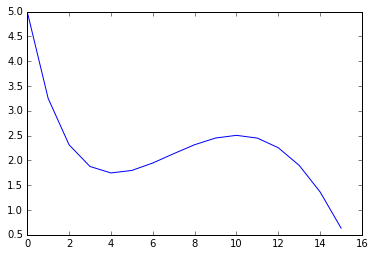

In [432]:
%matplotlib inline
plt.plot(x_values, free_terms)

### 2. Creating initial matrix of coefficients and vector of free terms: for y = kx + b

In [433]:
f(1)

3.2522168652714192